# Retrieve parameters for data treatment by simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from pathlib import Path

import os
import subprocess

# change the current directory
# to specified directory
os.chdir(r"/home/simo/Scrivania/Thesis/7C2_Analysis/Data")

Define functions

In [2]:
def get_indices_in_range(lst, start, end):
    """
    Returns a new list containing only the indices of the values within the given range (inclusive).
    """
    return [i for i, x in enumerate(lst) if start <= x <= end]

def remove_indexes(my_list, indexes_to_remove):
    return [x for i, x in enumerate(my_list) if i not in indexes_to_remove]

def read_dat_file(filename,skip):
    data = np.loadtxt(filename+'.dat',skiprows= skip,encoding='unicode_escape') #utf-8-sig')
    col = []
    num = len(data.transpose())
    for i in range(num):
        if num == len(data):
            col1 = data[i]
        else:
            col1 = data[:,i]
        col.append(col1)

    return col


def my_round(x,dx):      # per avere dato + errore con le giuste cire significative (incertezza con una sola cifra significativa)  ---> da sistemare,quando dx salta di cifra x resta arrotondato a cifra sotto
    round_x = []
    if np.size(x) > 1:
        for i in range(np.size(x)):
            if dx[i] < 1:
                dist = -int(np.log10(dx[i])-1)
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx[i]))
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)))
            round_x.append([x_new,dx_new])
    else:
            if dx < 1:
                dist = -int(np.log10(dx)-1)
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx))
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)))
            round_x.append([x_new, dx_new])
    return round_x

def write_line(file_name:str, line:int, content:str):
  line -= 1 # Python starts counting at 0, but people start counting at one. This accounts for that.
  with open(file_name, "r") as file: # Open the file in read mode
    lines = file.readlines() # Assign the file as a list to a variable
    lines[line] = content + "\n" # Replace the proper line with the provided content
  with open(file_name, "w") as file: # Open the file in write mode
    file.write("".join(lines)) # Write the modified content to the file

# Retrieve $\mu$

Retrieve $\mu_{tot}$ of V and $GeO_2$ to give input the Trasb.f code, $\mu_s$ and $\mu_a$ for MULTG.F

In [3]:
def lin_fit(x,a,b):
    return a*x+b

 $GeO_2$ mass density at experimental temperatures from extrapolation by known values

##### Extrapolation of maass density of GeO2 #####
Slope: -0.00018173345759552682 (g/cm^3)/K 
Intercept 3.714520037278658 g/cm^3


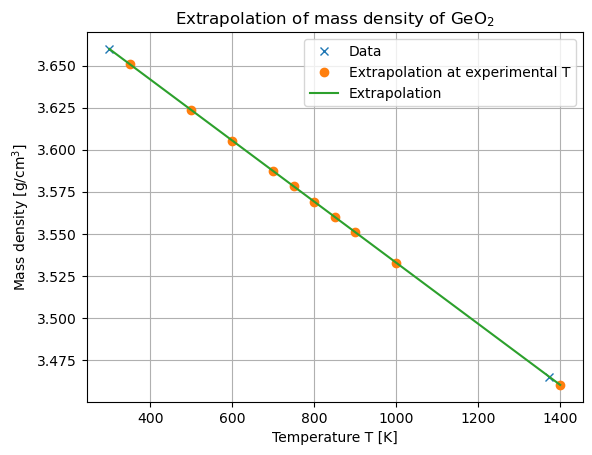

In [4]:
# Retrieve density of GeO2 at different T
T = np.array([350, 500, 600, 700, 750, 800, 850, 900, 1000,1400])
T_data = [300, 1373] #K
density = [3.66, 3.465]  # g/cm^3

slope = (density[0]-density[1])/(T_data[0]-T_data[1])
intercept = (T_data[1]*density[0]-T_data[0]*density[1])/(T_data[1]-T_data[0])
print('##### Extrapolation of maass density of GeO2 #####')
print('Slope:', slope,'(g/cm^3)/K \nIntercept',intercept,'g/cm^3')

density_geo2 = lin_fit(T,*[slope,intercept])

T_plot = np.linspace(min(T_data),max(T),10000)
plt.plot(T_data,density,'x',label = 'Data')
plt.plot(T[:],density_geo2[:],'o',label = 'Extrapolation at experimental T')
plt.plot(T_plot,lin_fit(T_plot,*[slope,intercept]), '-', label = 'Extrapolation')
plt.legend()
plt.grid()
plt.xlabel('Temperature T [K]')
plt.ylabel(r'Mass density [g/cm$^3$]')
plt.title(r'Extrapolation of mass density of GeO$_2$')
plt.show()

V mass density at experimental temperatures from extrapolation by known values.  
Use 300 K value up to 600 K, then 800 K value

##### Extrapolation of maass density of GeO2 #####
Slope: -0.000316931216931217 (g/cm^3)/K 
 Intercept 6.1918608465608465 g/cm^3
[6.09678148 5.93831587]


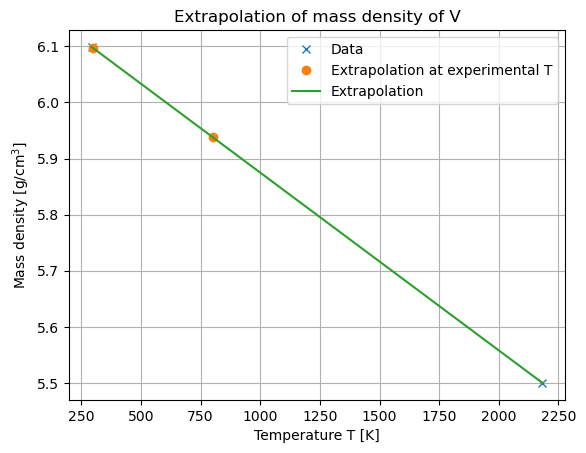

In [5]:
T_v = np.array([300, 800])
T_data = [293, 2183] #K
density = [6.099, 5.5]  # g/cm^3

slope = (density[0]-density[1])/(T_data[0]-T_data[1])
intercept = (T_data[1]*density[0]-T_data[0]*density[1])/(T_data[1]-T_data[0])
print('##### Extrapolation of maass density of GeO2 #####')
print('Slope:', slope,'(g/cm^3)/K \n Intercept',intercept,'g/cm^3')

density_v = lin_fit(T_v,*[slope,intercept])
print(density_v)

T_plot = np.linspace(min(T_data),max(T_data),10000)
plt.plot(T_data,density,'x',label = 'Data')
plt.plot(T_v[:],density_v[:],'o',label = 'Extrapolation at experimental T')
plt.plot(T_plot,lin_fit(T_plot,*[slope,intercept]), '-', label = 'Extrapolation')
plt.legend()
plt.grid()
plt.xlabel('Temperature T [K]')
plt.ylabel(r'Mass density [g/cm$^3$]')
plt.title(r'Extrapolation of mass density of V')
plt.show()

Finally retrieve the $\mu_{tot} = \sum_i n_i \sigma_{tot,i}$. With $\sigma_{tot} = \sigma_a + \sigma_s$ in barn and $n$ in atoms/$\AA^3$, then $\mu_{tot}$ is in $cm^{-1}$, the index $i$ runs on the atomic species in the sample.

######### V #########
Number density V [0.07207251 0.07019922] atoms/A^3
Total cross section V 7.162336310367985 barn


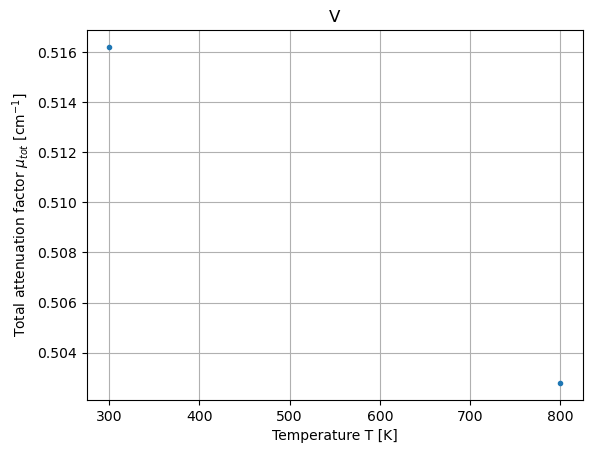

################# T = 300 K #################
Scattering 0.3676 cm^-1 Absorption 0.1486 cm^-1 Total = 0.5162 cm^-1
################# T = 800 K #################
Scattering 0.358 cm^-1 Absorption 0.1448 cm^-1 Total = 0.5028 cm^-1
######### GeO2 #########
Number density  [0.02101314 0.02085625 0.02075165 0.02064705 0.02059475 0.02054245
 0.02049015 0.02043785 0.02033326 0.01991486] molecules/A^3


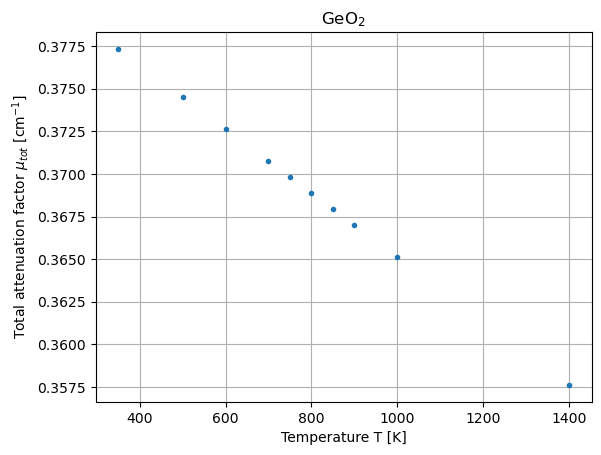

################# T = 350 K #################
Scattering 0.3586 cm^-1 Absorption 0.0188 cm^-1 Total = 0.3773 cm^-1
################# T = 500 K #################
Scattering 0.3559 cm^-1 Absorption 0.0186 cm^-1 Total = 0.3745 cm^-1
################# T = 600 K #################
Scattering 0.3541 cm^-1 Absorption 0.0185 cm^-1 Total = 0.3726 cm^-1
################# T = 700 K #################
Scattering 0.3523 cm^-1 Absorption 0.0184 cm^-1 Total = 0.3708 cm^-1
################# T = 750 K #################
Scattering 0.3514 cm^-1 Absorption 0.0184 cm^-1 Total = 0.3698 cm^-1
################# T = 800 K #################
Scattering 0.3505 cm^-1 Absorption 0.0184 cm^-1 Total = 0.3689 cm^-1
################# T = 850 K #################
Scattering 0.3496 cm^-1 Absorption 0.0183 cm^-1 Total = 0.3679 cm^-1
################# T = 900 K #################
Scattering 0.3488 cm^-1 Absorption 0.0183 cm^-1 Total = 0.367 cm^-1
################# T = 1000 K #################
Scattering 0.347 cm^-1 Absorption 

In [6]:
N = 6.022e23   #avogadro number
lamda = read_dat_file('calibration_parameters',1)[2]

print('######### V #########')

aw_v = 50.9415   #g/mol
n_v = density_v*N/aw_v*1e-24  # atoms/A^3
print('Number density V',n_v,'atoms/A^3')

sigma_v_s = 5.10   # sigma_s in barn
sigma_v_a = 5.08*lamda/1.798  # divide by lambda corresponding to 25.3 meV to consider energy dependence of absorbivity cross section

mu_v_s = n_v*sigma_v_s
mu_v_a = n_v*sigma_v_a

for i in range(len(T_v)):
    mu_v_s[i] = round(mu_v_s[i],4)
    mu_v_a[i] = round(mu_v_a[i],4)

sigma_v_tot = sigma_v_a + sigma_v_s

print('Total cross section V',sigma_v_tot,'barn')

mu_v = n_v*sigma_v_tot

plt.plot(T_v,mu_v,'.')
plt.grid()
plt.xlabel('Temperature T [K]')
plt.ylabel(r'Total attenuation factor $\mu_{tot}$ [cm$^{-1}$]')
plt.title('V')
plt.show()

for i in range(len(T_v)):
    print('################# T =', T_v[i], 'K #################')
    print('Scattering', mu_v_s[i], 'cm^-1', 'Absorption',mu_v_a[i], 'cm^-1','Total =', round(mu_v[i],4), 'cm^-1')

print('######### GeO2 #########')

aw_ge = 72.63 #g/mol
aw_o = 15.9994 #g/mol
aw_geo2 = aw_ge + 2*aw_o #g/mol

w_ge = aw_ge/aw_geo2
w_o = 2*aw_o/aw_geo2

n_ge =  density_geo2*N*w_ge/aw_ge*1e-24
n_o =  density_geo2*N*w_o/aw_o*1e-24
n_geo2 = density_geo2*N/aw_geo2*1e-24  # atoms/A^3

print('Number density ',n_geo2,'molecules/A^3')

#sum of atomic mu
sigma_ge_coh = 8.42
sigma_ge_inc = 0.18 
sigma_ge_a = 2.2*lamda/1.798
sigma_o_coh = 4.232
sigma_o_a = 0.000198*lamda/1.798

sigma_geo2_coh = sigma_ge_coh+2*sigma_o_coh

mu_o = n_o*(sigma_o_coh+sigma_o_a)
mu_ge = n_ge*(sigma_ge_coh+sigma_ge_inc+sigma_ge_a)

mu_geo2_s = n_o*sigma_o_coh + n_ge*(sigma_ge_coh + sigma_ge_inc)
mu_geo2_a = n_o*sigma_o_a + n_ge*sigma_ge_a


for i in range(len(T)):
    mu_geo2_s[i] = round(mu_geo2_s[i],4)
    mu_geo2_a[i] = round(mu_geo2_a[i],4)

mu_geo2=mu_ge+mu_o

plt.plot(T,mu_geo2,'.')
plt.grid()
plt.xlabel('Temperature T [K]')
plt.ylabel(r'Total attenuation factor $\mu_{tot}$ [cm$^{-1}$]')
plt.title(r'GeO$_2$')
plt.show()

for i in range(len(T)):
    print('################# T =', T[i], 'K #################')
    print('Scattering', mu_geo2_s[i], 'cm^-1', 'Absorption',mu_geo2_a[i], 'cm^-1','Total =', round(mu_geo2[i],4), 'cm^-1')

# Trasb

Find trasb_sample

In [7]:
thresh = 600   # use 300 K value of mu_v below this T, 800 K value above
trasb_sample = []
err_trasb_sample = []

os.chdir(r"../Trasb")

data_folder = Path("/home/simo/Scrivania/Thesis/7C2_Analysis/Trasb/")
name = 'TrasbIN.txt'
file_to_open = data_folder / name

for i in range(len(T)):
       
    write_line(file_to_open,4,'0.4 '+ str(mu_geo2[i]))
    
    if(T[i]<thresh+1):
        write_line(file_to_open,6, '0.55 '+ str(mu_v[0]))
    else:
        write_line(file_to_open,6, '0.55 '+ str(mu_v[1]))
    
    proc = subprocess.Popen(["./Trasb"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    
    output = proc.communicate()[0]

    trasb_sample.append(float(output[151:156]))
    err_trasb_sample.append(float(output[171:179]))

print(T)
print(trasb_sample)
print(err_trasb_sample)

[ 350  500  600  700  750  800  850  900 1000 1400]
[0.7056, 0.7065, 0.7071, 0.711, 0.7113, 0.7116, 0.7118, 0.7121, 0.7127, 0.7151]
[0.000545, 0.000546, 0.000546, 0.000549, 0.000549, 0.000549, 0.000549, 0.000549, 0.00055, 0.00055]


Find trasb_cell

In [8]:
trasb_cell = []
err_trasb_cell = []

write_line(file_to_open,4,'0.4 0.')

for i in range(len(T_v)):

    write_line(file_to_open,6, '0.55 '+ str(mu_v[i]))
    
    proc = subprocess.Popen(["./Trasb"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    
    output = proc.communicate()[0]

    trasb_cell.append(float(output[151:156]))
    err_trasb_cell.append(float(output[171:179]))

print(T_v)
print(trasb_cell)
print(err_trasb_cell)

[300 800]
[0.8372, 0.841]
[0.000635, 0.000638]


Find trasb_vanadium

In [9]:
write_line(file_to_open,4, '0.4 '+ str(mu_v[0]))
write_line(file_to_open,6,'0.55 0.')

proc = subprocess.Popen(["./Trasb"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

output = proc.communicate()[0]

trasb_v=float(output[151:156])
err_trasb_v = float(output[171:179])

print(trasb_v)
print(err_trasb_v)

0.8009
0.000677


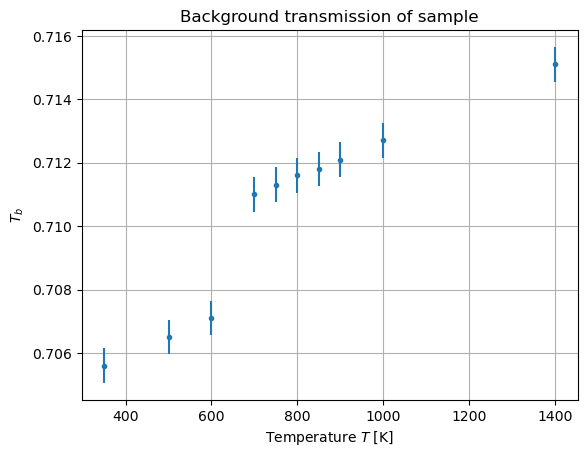

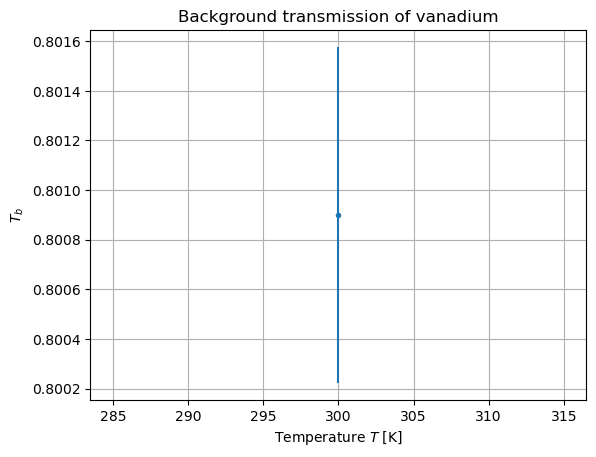

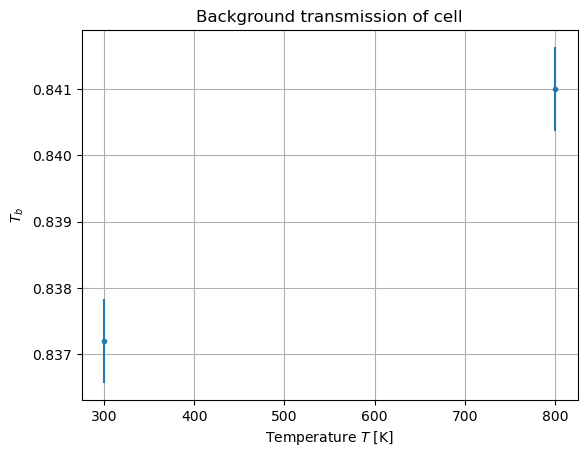

In [10]:

plt.errorbar(T,trasb_sample,yerr= err_trasb_sample, fmt ='.')
plt.xlabel(r'Temperature $T$ [K]')
plt.ylabel(r'$T_b$')
plt.title('Background transmission of sample')
plt.grid()
plt.show()


plt.errorbar(T_v[0],trasb_v,yerr = err_trasb_v, fmt = '.')
plt.xlabel(r'Temperature $T$ [K]')
plt.ylabel(r'$T_b$')
plt.title('Background transmission of vanadium')
plt.grid()
plt.show()


plt.errorbar(T_v,trasb_cell,yerr = err_trasb_cell, fmt='.')
plt.xlabel(r'Temperature $T$ [K]')
plt.ylabel(r'$T_b$')
plt.title('Background transmission of cell')
plt.grid()
plt.show()

# Cell and multiple scattering

Retrieve $m$, $\gamma$ and $T_m$ with Fortran MULTG.F

Define number of extractions (see /Multg/MULTG_stability.ipynb to select it) and angle mesh

In [11]:
NEST = 2e6  # number of extractions
angle_m = np.linspace(-4,126,27)  # angles at which perform the simulation
print(angle_m)

data_folder = Path("/home/simo/Scrivania/Thesis/7C2_Analysis/Multg/")
name = 'FORT4'
file_to_open = data_folder / name
write_line(file_to_open,7,str(NEST))   # select NEST
write_line(file_to_open,9, str(len(angle_m))+'.')
for i in range(len(angle_m)):
    write_line(file_to_open,10+i,str(angle_m[i]))

[ -4.   1.   6.  11.  16.  21.  26.  31.  36.  41.  46.  51.  56.  61.
  66.  71.  76.  81.  86.  91.  96. 101. 106. 111. 116. 121. 126.]


M e Trasm sample and sgamma (numerator of gamma)

In [12]:
sgamma = []
m_sample = []
m_v = []
trasm_sample = []
trasm_v = []

os.chdir(r"/home/simo/Scrivania/Thesis/7C2_Analysis/Multg")
name = 'OUTPUT'
code_file = 'MULTG.F'

file_to_change = data_folder / code_file 

write_line(file_to_change,225, '      IF(I.EQ.3)WRITE(5,222, ADVANCE=\'NO\')TRAS') # need to consider trasm from sample + cell

for i in range(len(T)):
    print('### T = %8.0f K ###' %T[i])
    write_line(file_to_open,3,'0.4       '+ str(mu_geo2_s[i])+'    '+str(mu_geo2_a[i]))
    if(T[i]< thresh +1):
        write_line(file_to_open,5,'0.55      '+ str(mu_v_s[0])+'    '+str(mu_v_a[0]))
    else:
        write_line(file_to_open,5,'0.55      '+ str(mu_v_s[1])+'    '+str(mu_v_a[1]))

    proc = subprocess.Popen(["gfortran -o MULTG MULTG.F && ./MULTG"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output =  proc.communicate()[0]
    
    Tm = read_dat_file(name,1)[1]
    m = read_dat_file(name,1)[2]
    g = read_dat_file(name,1)[3]

    trasm_sample.append(Tm)
    m_sample.append(m)
    sgamma.append(g)


### T =      350 K ###
### T =      500 K ###
### T =      600 K ###
### T =      700 K ###
### T =      750 K ###
### T =      800 K ###
### T =      850 K ###
### T =      900 K ###
### T =     1000 K ###
### T =     1400 K ###


M e trasm vandium

In [13]:
print('### T = %8.0f ### K' %T_v[0])
write_line(file_to_open,3,'0.4       '+ str(mu_v_s[0])+'    '+str(mu_v_a[0]))
write_line(file_to_open,5,'0.55      0.0       0.0')
write_line(file_to_change,225, '      IF(I.EQ.1)WRITE(5,222, ADVANCE=\'NO\')TRAS')   # Trasm just from vanadium

proc = subprocess.Popen(["gfortran -o MULTG MULTG.F && ./MULTG"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

output =  proc.communicate()[0]

trasm_v = read_dat_file(name,1)[1]
m_v = read_dat_file(name,1)[2]

### T =      300 ### K


In [14]:
gamma_den = []

write_line(file_to_open,3,'0.4       0.0       0.0')
write_line(file_to_change,225, '      IF(I.EQ.3)WRITE(5,222, ADVANCE=\'NO\')TRAS')

# need to consider trasm from sample + cell

for i in range(len(T_v)):
    print('### T = %8.0f ### K' %T_v[i])
    
    write_line(file_to_open,5,'0.55      '+ str(mu_v_s[i])+'    '+str(mu_v_a[i]))

    proc = subprocess.Popen(["gfortran -o MULTG MULTG.F && ./MULTG"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output =  proc.communicate()[0]
    
    den_gamma = read_dat_file(name,1)[3]

    gamma_den.append(den_gamma)

gamma = []

for i in range(len(T)):
    if(T[i] < thresh+1):
        gamma.append(sgamma[i]/gamma_den[0])
    else:
       gamma.append(sgamma[i]/gamma_den[1]) 

### T =      300 ### K
### T =      800 ### K


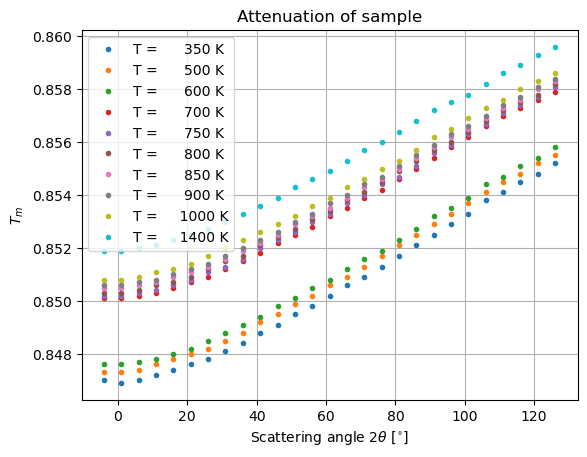

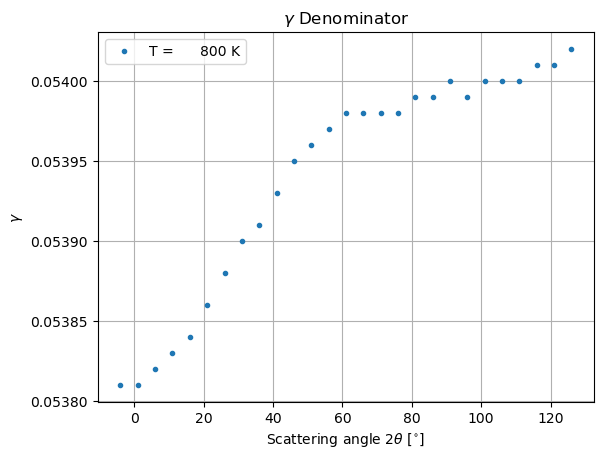

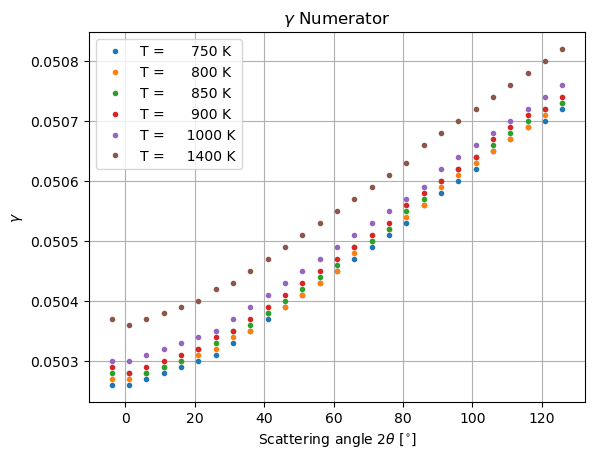

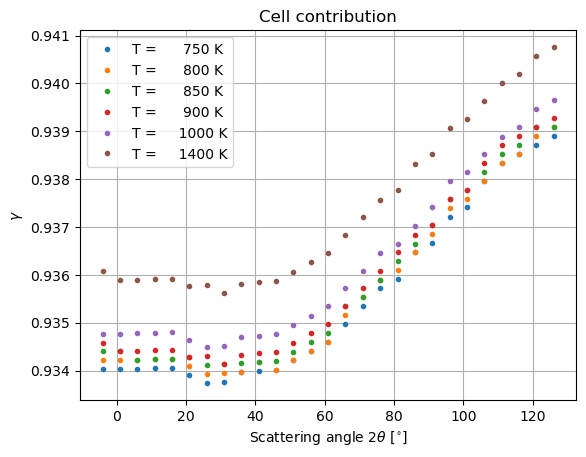

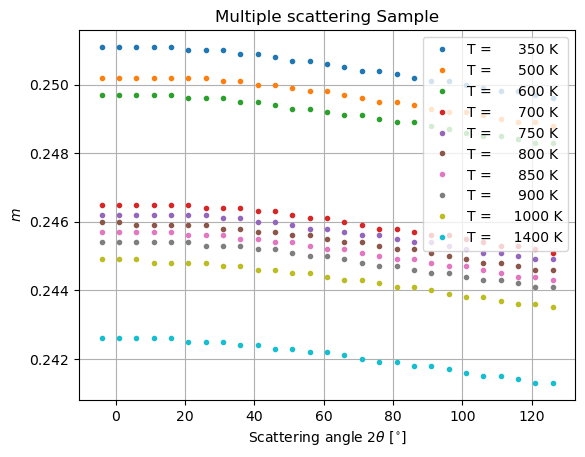

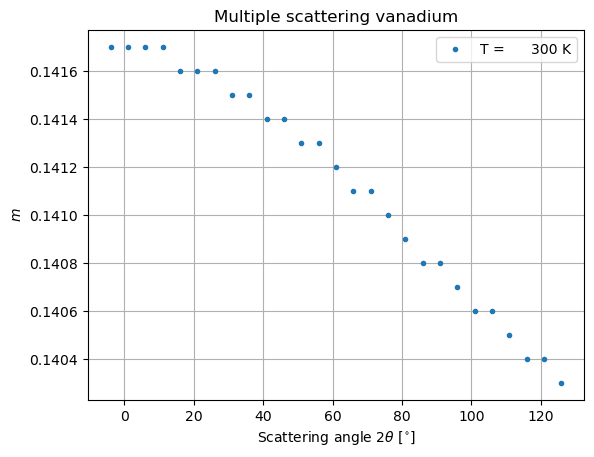

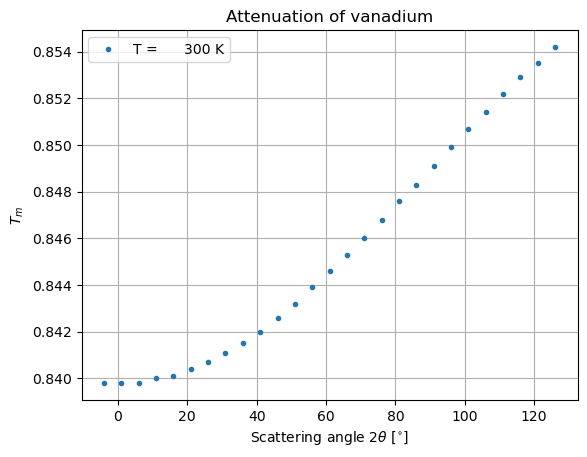

In [15]:
for i in range(len(T)):
    plt.plot(angle_m,trasm_sample[i],'.',label= 'T = %8.0f K' %T[i])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$T_m$')
plt.title('Attenuation of sample')
plt.grid()
plt.legend()
plt.show()

for i in range(1,len(T_v)):
    plt.plot(angle_m,gamma_den[i],'.',label= 'T = %8.0f K' %T_v[i])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$\gamma$')
plt.title(r'$\gamma$ Denominator')
plt.grid()
plt.legend()
plt.show()

for i in range(4,len(T)):
    plt.plot(angle_m,sgamma[i],'.',label= 'T = %8.0f K' %T[i])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$\gamma$')
plt.title(r'$\gamma$ Numerator')
plt.grid()
plt.legend()
plt.show()

for i in range(4,len(T)):
    plt.plot(angle_m,gamma[i],'.',label= 'T = %8.0f K' %T[i])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$\gamma$')
plt.title('Cell contribution')
plt.grid()
plt.legend()
plt.show()

for i in range(len(T)):
    plt.plot(angle_m,m_sample[i],'.',label= 'T = %8.0f K' %T[i])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$m$')
plt.title('Multiple scattering Sample')
plt.legend()
plt.grid()
plt.show()


plt.plot(angle_m,m_v,'.',label= 'T = %8.0f K' %T_v[0])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$m$')
plt.title('Multiple scattering vanadium')
plt.legend()
plt.grid()
plt.show()


plt.plot(angle_m,trasm_v,'.',label= 'T = %8.0f K' %T_v[0])
plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.ylabel(r'$T_m$')
plt.title('Attenuation of vanadium')
plt.legend()
plt.grid()
plt.show()


# Export results

In [16]:
data_folder = Path("/home/simo/Scrivania/Thesis/7C2_Analysis/Data/")
name = 'trasb_sample.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('T trasb_sample err_trasb_sample \n')
    for i in range(len(T)):
        f.write(str(T[i]))
        f.write(' ') 
        f.write(str(trasb_sample[i]))
        f.write(' ') 
        f.write(str(err_trasb_sample[i]))
        f.write('\n')
    f.close()

name = 'trasb_v.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('T trasb_v err_trasb_v \n')
    f.write(str(T_v[0]))
    f.write(' ') 
    f.write(str(trasb_v))
    f.write(' ') 
    f.write(str(err_trasb_v))
    f.close()

name = 'trasb_cell.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('T trasb_cell err_trasb_cell \n')
    for i in range(len(T_v)):
        f.write(str(T_v[i]))
        f.write(' ') 
        f.write(str(trasb_cell[i]))
        f.write(' ') 
        f.write(str(err_trasb_cell[i]))
        f.write('\n')
    f.close()


name = 'trasm.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('angle  350K 500K 600K 700K 750K 800K 850K 900K 1000K vanadium \n')
    for i in range(len(angle_m)):
        f.write(str(angle_m[i]))
        f.write(' ')
        for j in range(len(T)):
            f.write(str(trasm_sample[j][i]))
            f.write(' ')
        f.write(str(trasm_v[i]))
        f.write('\n')
    f.close()

name = 'emme.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('angle  350K 500K 600K 700K 750K 800K 850K 900K 1000K vanadium \n')
    for i in range(len(angle_m)):
        f.write(str(angle_m[i]))
        f.write(' ')
        for j in range(len(T)):
            f.write(str(m_sample[j][i]))
            f.write(' ')
        f.write(str(m_v[i]))
        f.write('\n')
    f.close()


name = 'gamma.dat'
file_to_open = data_folder / name

with open(file_to_open, 'w', encoding='utf-8') as f:
    f.write('angle  350K 500K 600K 700K 750K 800K 850K 900K 1000K \n')
    for i in range(len(angle_m)):
        f.write(str(angle_m[i]))
        f.write(' ')
        for j in range(len(T)):
            f.write(str(gamma[j][i]))
            f.write(' ')
        f.write('\n')
    f.close()